In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv"

df_stock=pd.read_csv(url)

df_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8465 non-null   object 
 1   Open       8465 non-null   float64
 2   High       8465 non-null   float64
 3   Low        8465 non-null   float64
 4   Close      8465 non-null   float64
 5   Volume     8465 non-null   int64  
 6   Adj Close  8465 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 463.1+ KB


In [3]:
df_stock.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


FASE 1: Configurando la Máquina del Tiempo
Para trabajar con series temporales en Pandas, la fecha TIENE que ser el índice (las filas no se llaman 0, 1, 2... se llaman "1980-12-12", etc.).

* Limpieza: Revisa los tipos de datos (info). La columna Date se cargará como objeto (texto). Conviértela a datetime.

* El Índice: Usa df_apple.set_index('Date', inplace=True) para mover la fecha al índice.

* Sanity Check: Haz un head(). ¿Las filas ahora están etiquetadas con fechas?

In [4]:
#convertimos date de object a datetime
df_stock['Date']=df_stock['Date'].str.strip()
df_stock['Date']=pd.to_datetime(df_stock['Date'])
#cambiamos el index por la columna date
df_stock.set_index('Date',inplace=True)
#lo ordenamos de mas viejo a mas actual
df_stock.sort_index(ascending=True, inplace=True)
df_stock.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41


FASE 2: Resampling (La Habilidad Nueva) ⭐️
Los datos vienen "diarios" (una fila por día). Pero el Jefe quiere ver la tendencia a largo plazo, sin tanto ruido diario. Quiere ver el precio promedio por año.

En SQL harías un GROUP BY YEAR(date). En Pandas, usamos resample.

* Agrupación Temporal: Crea un nuevo DataFrame df_anual usando: df_apple.resample('Y').mean() (La 'Y' significa Year/Año. Calculará el promedio de todas las columnas numéricas para cada año).

* Visualización: Haz un gráfico de línea (lineplot) usando este nuevo df_anual. Usa la columna Adj Close (Precio de cierre ajustado).

Pregunta: ¿A partir de qué año parece que Apple despegó exponencialmente? (Coincide con el lanzamiento del iPhone).

In [17]:
df_anual=df_stock.resample('Y').mean()
df_anual['Year'] = df_anual.index.year
df_anual.head()

C:\Users\Dark7 120gb\AppData\Local\Temp\ipykernel_13952\1267492760.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_anual=df_stock.resample('Y').mean()


,Open,High,Low,Close,Volume,Adj Close,Year
Date,,,,,,,
1980-12-31,30.481538,30.567692,30.443077,30.443077,2.586252e+07,0.473077,1980
1981-12-31,24.386349,24.471865,24.311151,24.311151,8.131889e+06,0.378651,1981
1982-12-31,19.139723,19.412688,18.957036,19.142727,2.111167e+07,0.298261,1982
1983-12-31,37.524841,38.376071,36.669841,37.521984,4.134987e+07,0.584643,1983
1984-12-31,26.869960,27.393755,26.351581,26.801897,4.148126e+07,0.417787,1984


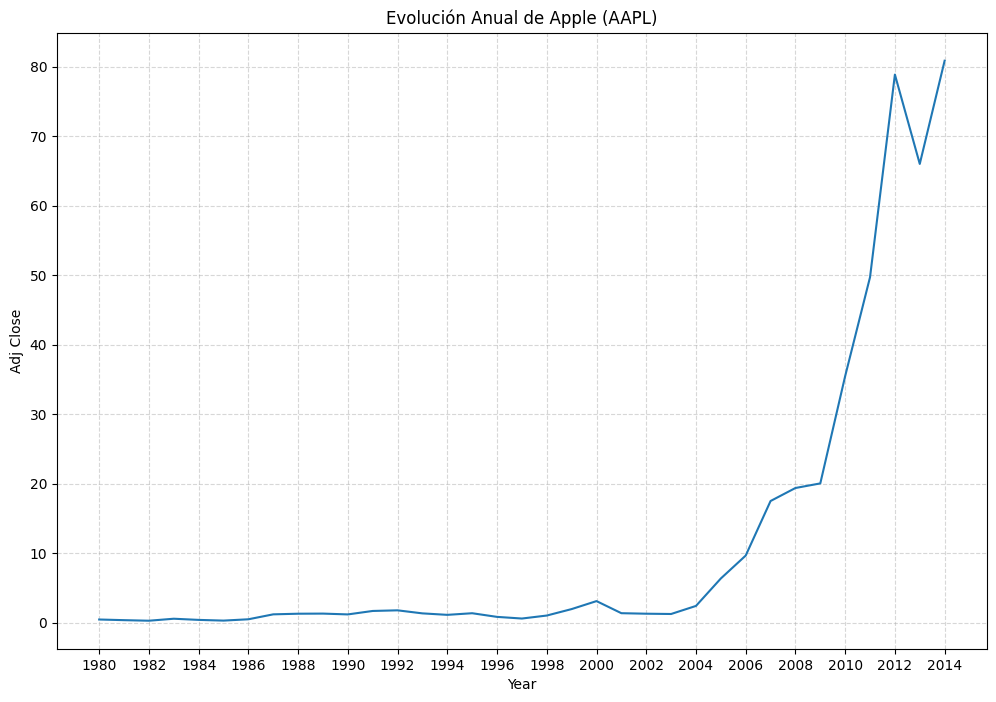

In [21]:
plt.figure(figsize=(12,8))
sns.lineplot(data=df_anual, x='Year', y='Adj Close')
plt.title('Evolución Anual de Apple (AAPL)')
plt.xticks(np.arange(1980,2016,2))
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.show()

FASE 3: Volatilidad (¿Cuándo hubo más miedo?)
En finanzas, la "volatilidad" suele asociarse a cuánto varía el precio (desviación estándar).

* En lugar de usar .mean() (promedio), usa .std() (desviación estándar) con resample('Y').

* Ordena los valores (sort_values) de mayor a menor basándote en Adj Close.

Pregunta: ¿Qué año tuvo la mayor oscilación/variabilidad de precios?

Instrucción: Carga, convierte el índice a fecha, haz el resample y dime:

* ¿En qué año empezó la subida vertical de la acción?

* ¿Cuál fue el año más volátil (con mayor desviación estándar) de la historia registrada en este dataset?

In [22]:
df_anual_std=df_stock.resample('Y').std()
df_anual_std['Year'] = df_anual.index.year
df_anual_std.head()

C:\Users\Dark7 120gb\AppData\Local\Temp\ipykernel_13952\864732352.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_anual_std=df_stock.resample('Y').std()


,Open,High,Low,Close,Volume,Adj Close,Year
Date,,,,,,,
1980-12-31,3.844498,3.844273,3.843764,3.843764,2.903914e+07,0.061153,1980
1981-12-31,4.899738,4.905464,4.896449,4.896449,6.635420e+06,0.076370,1981
1982-12-31,5.977608,6.275636,5.765481,6.048168,1.598382e+07,0.094618,1982
1983-12-31,12.242139,12.320738,12.080744,12.233092,3.014605e+07,0.190467,1983
1984-12-31,2.119966,2.196470,2.025377,2.172042,2.428154e+07,0.033639,1984


In [24]:
df_anual_std.sort_values(by='Adj Close',ascending=False)

,Open,High,Low,Close,Volume,Adj Close,Year
Date,,,,,,,
2012-12-31,67.530440,67.692251,66.611000,66.976889,5.795175e+07,9.211131,2012
2014-12-31,173.656505,175.125229,172.576449,174.019894,3.257756e+07,7.274527,2014
2013-12-31,45.001195,44.552245,45.073682,44.887792,4.426040e+07,6.598152,2013
2009-12-31,40.054322,39.915687,39.827080,39.810909,5.337762e+07,5.435768,2009
2010-12-31,37.494782,37.444926,37.780231,37.556456,6.506366e+07,5.128087,2010
2007-12-31,35.372879,35.916598,34.354329,35.245752,1.055312e+08,4.812865,2007
2008-12-31,33.790278,33.651244,33.759725,33.732225,1.137295e+08,4.606129,2008
2011-12-31,25.969865,26.351049,25.557721,25.923846,5.466353e+07,3.539682,2011
2005-12-31,14.891932,15.084577,14.704733,14.947677,1.156161e+08,1.560848,2005


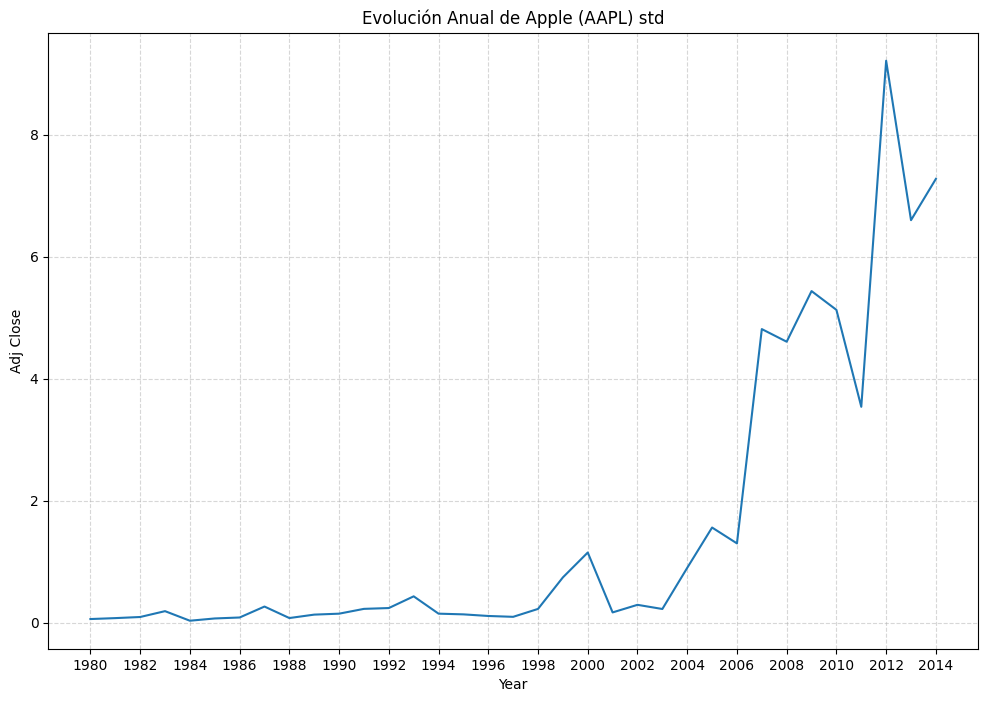

In [26]:
plt.figure(figsize=(12,8))
sns.lineplot(data=df_anual_std, x='Year', y='Adj Close')
plt.title('Evolución Anual de Apple (AAPL) std')
plt.xticks(np.arange(1980,2016,2))
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.show()